### 9 ions

Date 2025-03-10, Time 13-9
Date 2025-03-10, Time 13-9
Date 2025-03-10, Time 13-9
Date 2025-03-10, Time 13-9
Date 2025-03-10, Time 13-9
Date 2025-03-10, Time 13-9
Date 2025-03-10, Time 13-9
Date 2025-03-10, Time 13-9
Date 2025-03-10, Time 13-9
Date 2025-03-10, Time 13-10
Date 2025-03-10, Time 13-10
Date 2025-03-10, Time 13-10
Date 2025-03-10, Time 13-10
Date 2025-03-10, Time 13-10
Date 2025-03-10, Time 13-10
Date 2025-03-10, Time 13-10
Start time = 1.935 us
End time = 2.235 us


<Figure size 640x480 with 0 Axes>

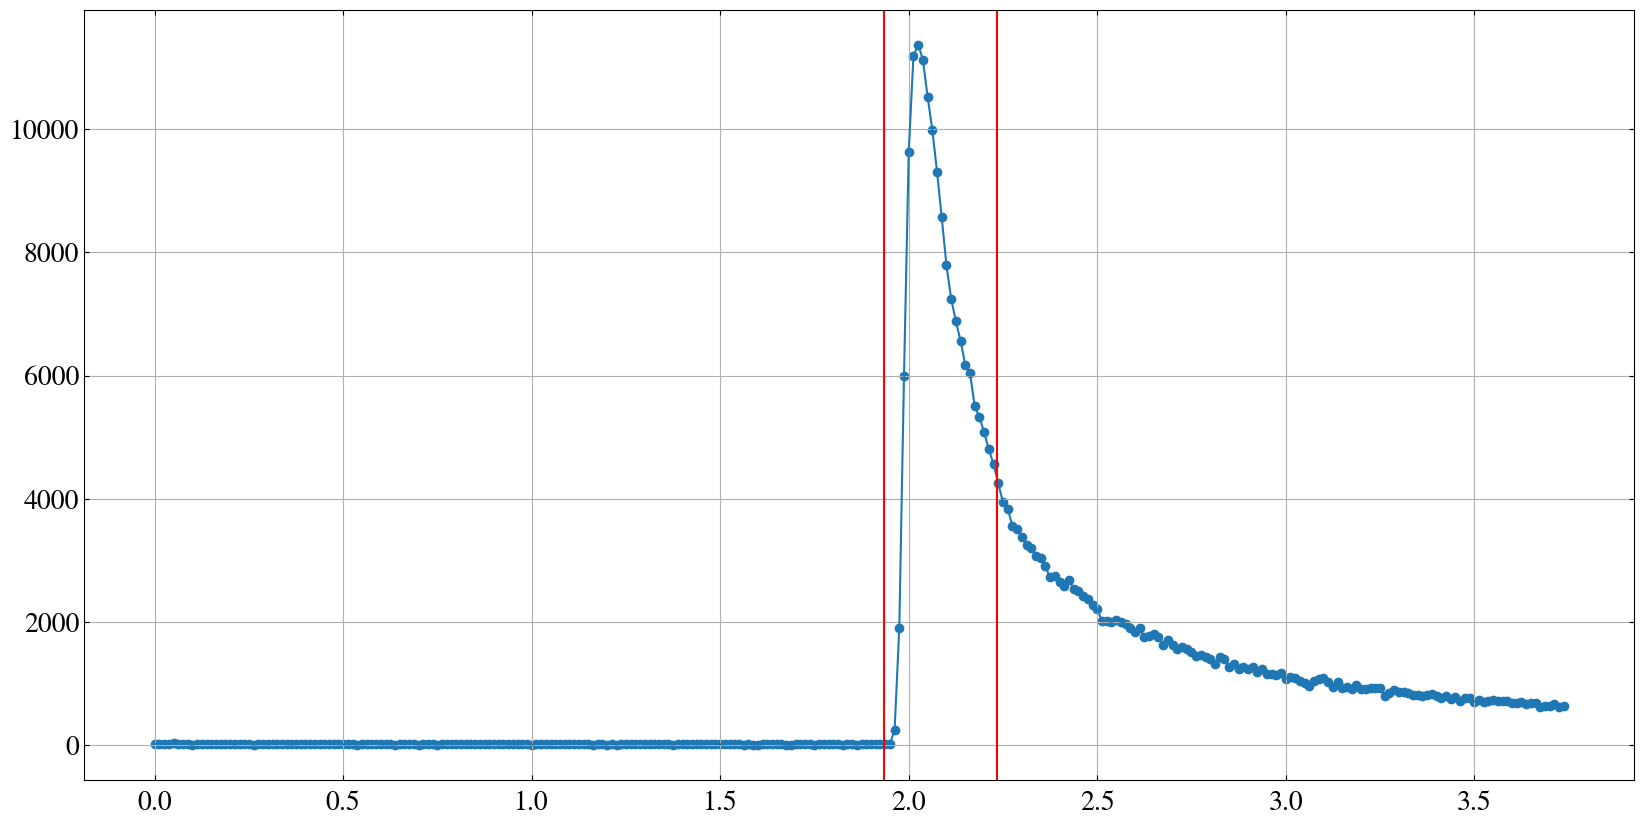

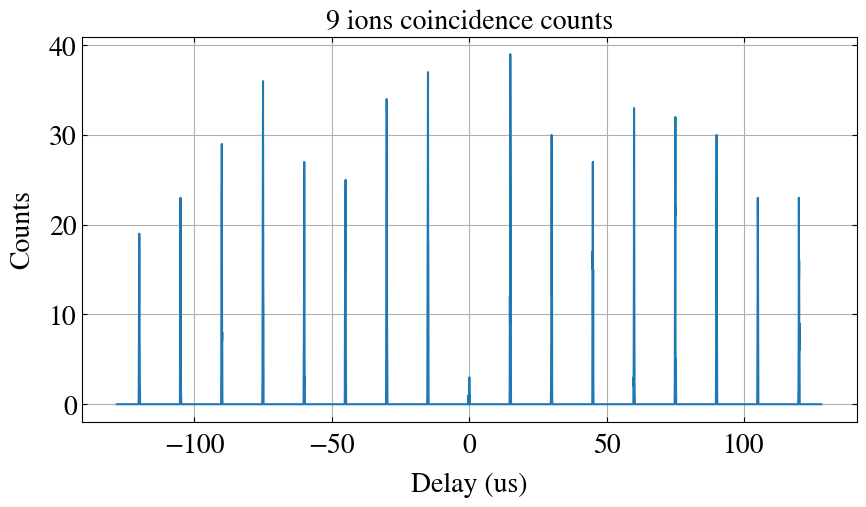

In [1]:
import os
from matplotlib import pyplot as plt
from datetime import datetime
import TimeTagger
import matplotlib
import asyncio
import numpy as np
from ipywidgets import Button
import plotly.graph_objs as go
import pprint

matplotlib.rcParams.update(
        {"font.family": "STIXGeneral",
         "xtick.labelsize": 20,
         "xtick.direction": "in",
         "xtick.major.pad": 8,
         "xtick.top": True,
         "ytick.labelsize": 20,
         "ytick.direction": "in",
         "ytick.right": True,
         "axes.labelsize": 20,
         "axes.labelpad": 10,
         "axes.grid": True
    }
)

# Useful function for printing what is stored in the folder and display the files that are just created
def print_folder_content(folder):
    """Print filename and size of the files in the folder."""
    print("Filename            |       Size")
    print("--------------------+-----------")
    filenames = os.listdir(folder)
    for filename in [filenames[-1]] + filenames[:-1]:
        print("{:<20}|{:>8.1f} kB".format(filename, os.path.getsize(folder + os.sep + filename)/1024))

# Getting the current date and time
now = datetime.now()
# Extracting the date, hour, and minute
current_date = now.date()
current_hour = now.hour
current_minute = now.minute
# Converting to a char string
formatted_string = f"Date {current_date}, Time {current_hour}-{current_minute}"

# filename=save_directory + "/filewriter" + formatted_string
# filename="D:/Data Storage/Multiplexing/g2_data" + "/filewriterDate 2024-01-04, Time 12-25.1"

all_raw_data = ["/filewriterDate 2024-01-03, Time 16-3.1",
                "/filewriterDate 2024-01-03, Time 16-25.1",
                "/filewriterDate 2024-01-03, Time 16-44.1",
                "/filewriterDate 2024-01-03, Time 17-3.1",
                "/filewriterDate 2024-01-03, Time 17-22.1",
                "/filewriterDate 2024-01-03, Time 17-41.1",
                "/filewriterDate 2024-01-03, Time 19-55.1",
                "/filewriterDate 2024-01-04, Time 10-29.1",
                "/filewriterDate 2024-01-04, Time 10-53.1",
                "/filewriterDate 2024-01-04, Time 12-25.1",
                "/filewriterDate 2024-01-04, Time 12-53.1",
                "/filewriterDate 2024-01-04, Time 13-21.1",
                "/filewriterDate 2024-01-04, Time 13-41.1",
                "/filewriterDate 2024-01-04, Time 17-4.1",
                "/filewriterDate 2024-01-04, Time 17-23.1",
                "/filewriterDate 2024-01-04, Time 17-43.1",
                "/filewriterDate 2024-01-04, Time 18-20.1",
                "/filewriterDate 2024-01-04, Time 18-50.1",
                "/filewriterDate 2024-01-04, Time 19-37.1",
                "/filewriterDate 2024-01-04, Time 19-57.1",
                "/filewriterDate 2024-01-04, Time 20-17.1",
                "/filewriterDate 2024-01-04, Time 21-0.1",
                "/filewriterDate 2024-01-05, Time 17-34_9_ions.1",
                "/filewriterDate 2024-01-05, Time 17-56_9_ions.1"]

raw_data = ["/filewriterDate 2024-01-03, Time 16-3.1",
            "/filewriterDate 2024-01-03, Time 16-44.1",
            "/filewriterDate 2024-01-03, Time 17-3.1",
            "/filewriterDate 2024-01-03, Time 17-22.1",
            "/filewriterDate 2024-01-03, Time 19-55.1",
            "/filewriterDate 2024-01-04, Time 10-29.1",
            "/filewriterDate 2024-01-04, Time 10-53.1",
            "/filewriterDate 2024-01-04, Time 12-25.1",
            "/filewriterDate 2024-01-04, Time 12-53.1",
            "/filewriterDate 2024-01-04, Time 13-21.1",
            "/filewriterDate 2024-01-04, Time 13-41.1",
            "/filewriterDate 2024-01-04, Time 17-4.1",
            "/filewriterDate 2024-01-04, Time 18-20.1",
            "/filewriterDate 2024-01-04, Time 19-37.1",
            "/filewriterDate 2024-01-04, Time 19-57.1",
            "/filewriterDate 2024-01-04, Time 21-0.1"]

# raw_data = ["/filewriterDate 2024-01-03, Time 16-3.1"]

# Number of bins and binwidth for correlation measurement
number = int(5700 * (0.9))
binwidth_corr = 50 * 1e3

# Number of bins and binwidth for histogram measurement
number_bins = 300
binwidth_hist = 125 * 1e3 / 10

time_filtering = (0.3) * 1e6
Start_time = 1.935
End_time = Start_time + time_filtering/1e6

# The Virtual Time Tagger is initialized similar to the physical one
tagger = TimeTagger.createTimeTaggerVirtual()
fig = plt.figure()

final_result = np.zeros(number)
final_hist = np.zeros(number_bins)
# The loop allows us to repeat the replay several times
for data in raw_data:
    # print("\nInput data for the data replay")

    trigger_channel = 2
    PMT_channel1 = 1
    PMT_channel2 = 3
    binwidth = binwidth_corr  # Adjust binwidth as needed
    n_bins = number   # Adjust number of bins as needed
    # DELAY = 2000 * 1e3 # The gate time is 1us

    open_gate = TimeTagger.DelayedChannel(tagger=tagger, input_channel=trigger_channel, delay=Start_time * 1e6)
    open_gate_channel = open_gate.getChannel()
    close_gate = TimeTagger.DelayedChannel(tagger=tagger, input_channel=open_gate_channel, delay=time_filtering)
    close_gate_channel = close_gate.getChannel()

    gated_PMT_channel1 = TimeTagger.GatedChannel(tagger=tagger, input_channel=PMT_channel1, gate_start_channel=open_gate_channel, gate_stop_channel=close_gate_channel)
    gated_PMT_channel2 = TimeTagger.GatedChannel(tagger=tagger, input_channel=PMT_channel2, gate_start_channel=open_gate_channel, gate_stop_channel=close_gate_channel)

    # Start the correlation measurement
    # We can pass virtual_tagger to the "tagger" argument of any measurement class constructor
    corr = TimeTagger.Correlation(tagger=tagger, channel_1=gated_PMT_channel1.getChannel(), channel_2=gated_PMT_channel2.getChannel(), binwidth=binwidth_corr, n_bins=n_bins)
    # measurement_time = int(0.001 * 3600 * 1e12)  # Adjust measurement time as needed

    hist = TimeTagger.Histogram(tagger=tagger, click_channel=PMT_channel1, start_channel = trigger_channel, binwidth = binwidth_hist, n_bins = number_bins)

    # In general, the data are replayed at the same speed as they have been acquired.
    # You can modify the speed by a factor or replay them as fast es possible by speed < 0
    tagger.setReplaySpeed(speed=-1)

    # Start the replay
    filename = "D:/Data Storage/Multiplexing/g2_data" + data
    tagger.replay(file=filename)

    # To check if the replay is finished, use the waitForCompletion method. If you want to do
    # something during the measurement (such as watching the accumulation), use a while loop and
    # timeout=0. If you just want to wait for completion, you can skip the loop and use
    # timeout=-1 instead.
    while not tagger.waitForCompletion(timeout=-1):
        fig.clear()
        plt.plot(corr.getIndex(), corr.getData())
        plt.xlabel("Time difference [ps]")
        plt.ylabel("Counts")
        plt.pause(.1)

    # Get the correlation data
    g2_data = corr.getData()
    index = corr.getIndex() / 1e6

    # Get the correlation data
    hist_data = hist.getData()
    hist_index = hist.getIndex() / 1e6
    final_hist += hist_data
    # np.save('hist_meas_'+formatted_string+'.npy', hist_index, hist_data)

    # Converting to a char string
    formatted_string = f"Date {current_date}, Time {current_hour}-{current_minute}"
    print(formatted_string)

    final_result += g2_data
    # np.save('corr_meas_'+formatted_string+'.npy', index, g2_data)

    # Getting the current date and time
    now = datetime.now()

    # Extracting the date, hour, and minute
    current_date = now.date()
    current_hour = now.hour
    current_minute = now.minute

    # np.save('corr.getData_'+formatted_string+'.npy', corr.getData())
    # np.save('corr.getIndex_'+formatted_string+'.npy', corr.getIndex())

# Free the TimeTagger
TimeTagger.freeTimeTagger(tagger)

plt.figure(figsize = (20, 10))
plt.rc('font',family='STIXGeneral')
plt.scatter(hist_index, final_hist, c='C0')
plt.plot(hist_index, final_hist, c='C0')

plt.axvline(Start_time, color='r')
print("Start time =", Start_time, "us")
plt.axvline(End_time, color='r')
print("End time =", End_time, "us")

# Plot the g(2) function
plt.figure(figsize = (10, 5))
plt.plot(index, final_result)
plt.title("9 ions coincidence counts", fontdict={'size':20})
plt.xlabel("Delay (us)")
plt.ylabel("Counts")
plt.show()

np.save("final_result_static_9_ion_chain.npy", final_result)

In [ ]:
# !pip install --upgrade pip
# !pip install -U TimeTagger
# !pip install TimeTaggerRPC
# !python3 -m pip install TimeTagger
# !python3 -m pip install TimeTaggerRPC
# !pip install brokenaxes

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


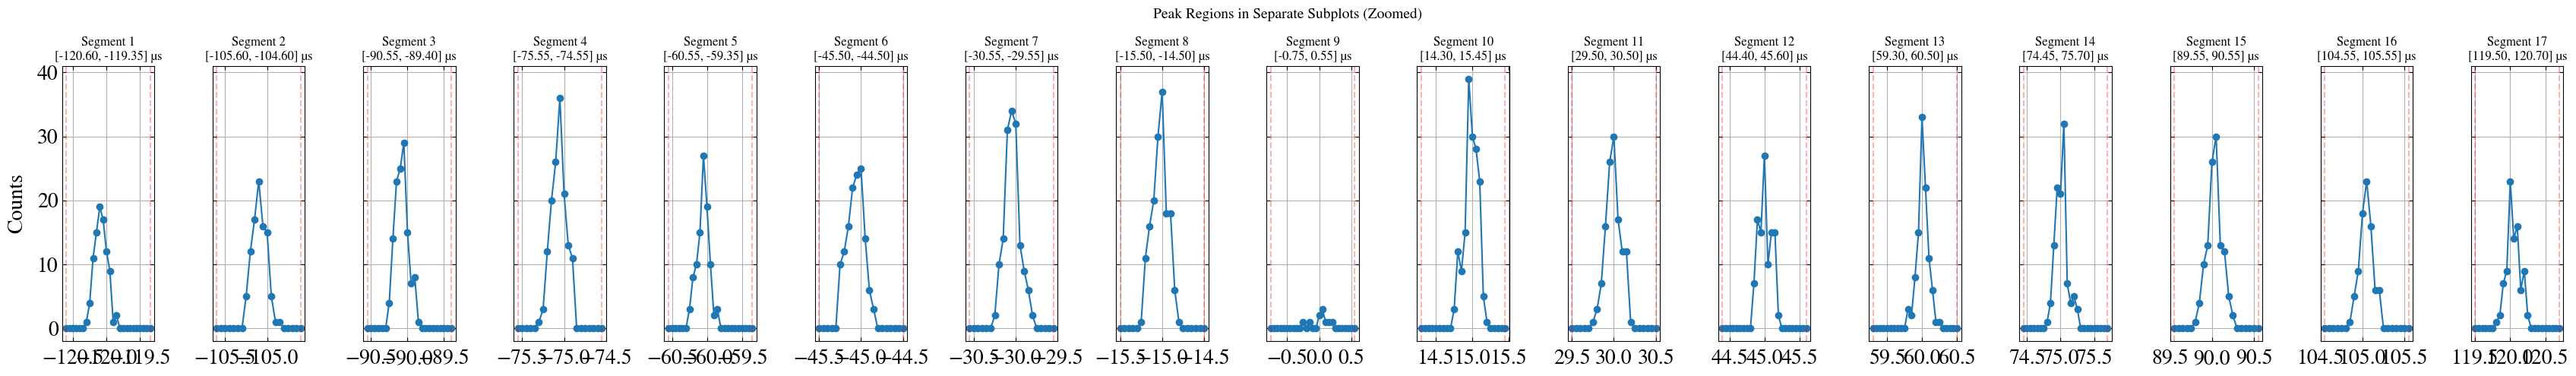

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Suppose you already have: index (x-values) and final_result (y-values)
# 1) Detect peaks
peak_threshold = 0.01 * np.max(final_result)
peaks, _ = find_peaks(final_result, height=peak_threshold)

# 2) Define a window around each peak
window = 10
segments = []
for p in peaks:
    start = max(0, p - window)
    end   = min(len(final_result), p + window + 1)
    segments.append((start, end))

# 3) Merge overlapping segments
segments.sort()
merged_segments = []
for seg in segments:
    if not merged_segments:
        merged_segments.append(seg)
    else:
        last_seg = merged_segments[-1]
        if seg[0] <= last_seg[1]:
            merged_segments[-1] = (last_seg[0], max(last_seg[1], seg[1]))
        else:
            merged_segments.append(seg)

# 4) Plot each merged segment in its own subplot
n_segments = len(merged_segments)
if n_segments == 0:
    print("No peaks found above threshold.")
else:
    fig, axs = plt.subplots(
        1, n_segments,  # one row, n_segments columns
        figsize=(max(10, 2*n_segments), 5),
        sharey=True      # share y-axis so all subplots have same scale
    )
    # If there is only one segment, axs is not a list; make it a list
    if n_segments == 1:
        axs = [axs]

    for i, (start, end) in enumerate(merged_segments):
        seg_x = index[start:end]
        seg_y = final_result[start:end]

        # Plot the segment
        axs[i].plot(seg_x, seg_y, marker='o', linestyle='-')
        axs[i].set_title(f"Segment {i+1}\n[{seg_x[0]:.2f}, {seg_x[-1]:.2f}] µs")
        axs[i].grid(True)

        # (Optional) Add vertical lines at the boundaries
        axs[i].axvline(seg_x[0], color='r', linestyle='--', alpha=0.3)
        axs[i].axvline(seg_x[-1], color='r', linestyle='--', alpha=0.3)

    axs[0].set_ylabel("Counts")
    fig.suptitle("Peak Regions in Separate Subplots (Zoomed)", fontsize=14)
    plt.tight_layout()
    plt.show()

C:\Users\lattice_team\AppData\Local\Temp\ipykernel_8000\2594843508.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


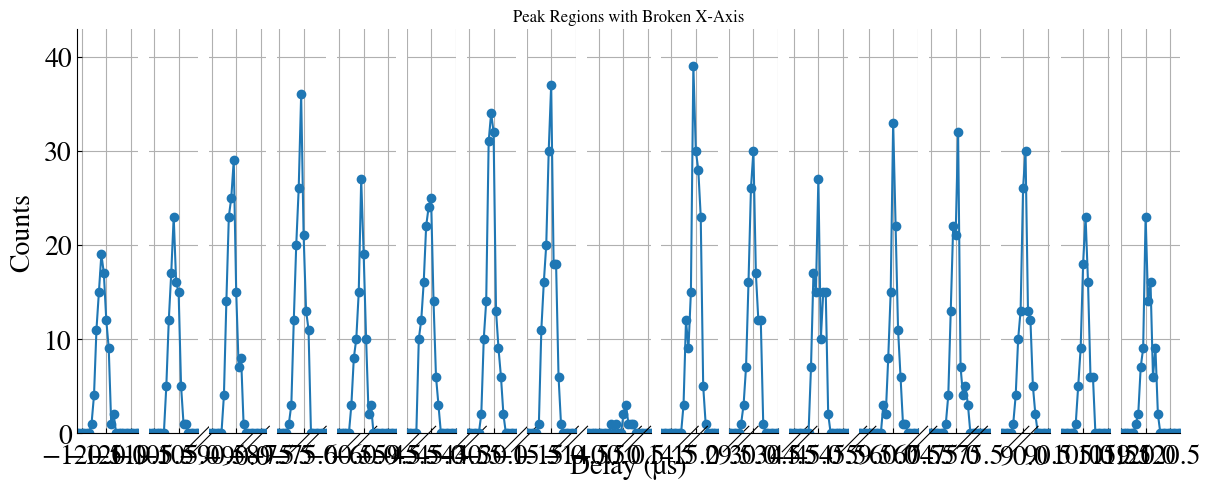

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from brokenaxes import brokenaxes

# Suppose you already have:
# index         -> x-values
# final_result  -> y-values from your correlation measurement

# 1) Detect peaks
peak_threshold = 0.01 * np.max(final_result)
peaks, _ = find_peaks(final_result, height=peak_threshold)

# 2) Define a window around each peak
window = 10
segments = []
for p in peaks:
    start = max(0, p - window)
    end   = min(len(final_result), p + window + 1)
    segments.append((start, end))

# 3) Merge overlapping segments
segments.sort()
merged_segments = []
for seg in segments:
    if not merged_segments:
        merged_segments.append(seg)
    else:
        last_seg = merged_segments[-1]
        if seg[0] <= last_seg[1]:
            merged_segments[-1] = (last_seg[0], max(last_seg[1], seg[1]))
        else:
            merged_segments.append(seg)

# 4) Convert merged segments into x‐range tuples
#    We’ll feed these to brokenaxes so each segment is a separate region.
x_breaks = []
for (s, e) in merged_segments:
    # 's' and 'e' are array indices; map them to actual x-values
    # e-1 because slicing is exclusive at the end
    x_breaks.append( (index[s], index[e-1]) )

# 5) Create a single figure with a "broken" x-axis for each segment
#    We set a single y-limit spanning 0 to 10% above the maximum count
fig = plt.figure(figsize=(12, 5))
bax = brokenaxes(xlims=x_breaks, ylims=((0, 1.1*np.max(final_result)),), hspace=.05)

# 6) Plot all data in one go. brokenaxes automatically “splits” the x‐axis
bax.plot(index, final_result, marker='o', linestyle='-')

# 7) Labeling
bax.set_xlabel("Delay (µs)")
bax.set_ylabel("Counts")
bax.set_title("Peak Regions with Broken X-Axis")

plt.tight_layout()
plt.show()

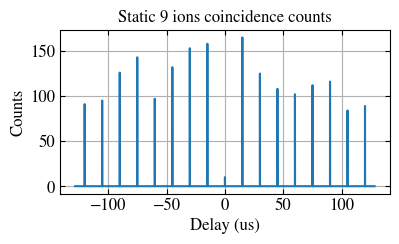

[91.0, 95.0, 126.0, 143.0, 97.0, 132.0, 153.0, 158.0, 10.0, 165.0, 125.0, 108.0, 102.0, 112.0, 116.0, 84.0, 89.0]
[-120.1, -105.1, -90.05, -75.05, -60.05, -45.0, -30.05, -15.0, 0.05, 14.95, 30.0, 45.0, 60.0, 75.05, 90.05, 105.05, 120.0]
17
17


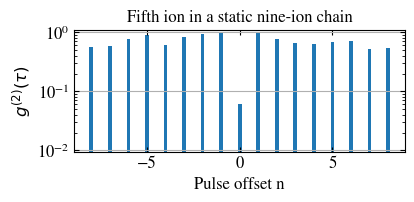

[0.5634674922600619, 0.5882352941176471, 0.7801857585139319, 0.8854489164086687, 0.6006191950464397, 0.8173374613003096, 0.9473684210526315, 0.978328173374613, 0.06191950464396285, 1.021671826625387, 0.7739938080495357, 0.6687306501547987, 0.631578947368421, 0.6934984520123839, 0.718266253869969, 0.5201238390092879, 0.5510835913312694]


In [7]:
matplotlib.rcParams.update(
        {"font.family": "STIXGeneral",
         "xtick.labelsize": 12,
         "xtick.direction": "in",
         "xtick.major.pad": 3,
         "xtick.top": True,
         "ytick.labelsize": 12,
         "ytick.direction": "in",
         "ytick.right": True,
         "axes.labelsize": 12,
         "axes.labelpad": 3,
         "axes.grid": True
    }
)

final_result = np.load("final_result_static_9_ion_chain.npy")
# Example numpy array with peaks
data_temp = final_result

# Function to sum the values of nearby bins (5 bins) and set other bins to zero
def rearrange_peaks(data):
    # Length of the data array
    n = len(data)

    # New array to store the rearranged data
    new_data = np.zeros(n)

    # Iterate through the array
    for i in range(n):
        # Check if the current bin is a peak (max in its 5-bin neighborhood)
        if i == 0 or i == n-1:
            # Edge cases where the neighborhood is not 5 bins
            continue
        else:
            start = max(i-20, 0)
            end = min(i+20, n)
            if data[i] == max(data[start:end]):
                # Sum the values of the 5-bin neighborhood
                new_data[i] = np.sum(data[start:end])

    return new_data

# Apply the function to the data
rearranged_data = rearrange_peaks(data_temp)
# rearranged_data = rearranged_data/np.max(rearranged_data)

# Plot the g(2) function
half_column_width_inches = 4.25
aspect_ratio = 2  # You can adjust this for your desired aspect ratio
plt.figure(figsize=(half_column_width_inches, half_column_width_inches / aspect_ratio))
plt.plot(index, rearranged_data)
plt.title("Static 9 ions coincidence counts", fontdict={'size':12})
plt.xlabel("Delay (us)", fontdict={'size':12})
plt.ylabel("Counts", fontdict={'size':12})
plt.show()
# Getting the current date and time
now = datetime.now()
# Extracting the date, hour, and minute
current_date = now.date()
current_hour = now.hour
current_minute = now.minute
# Converting to a char string
formatted_string = f"Date {current_date}, Time {current_hour}-{current_minute}"
non_zero_numbers = [float(num) for num in rearranged_data if float(num) != 0]

non_zero_numbers = []
non_zero_x_labels = []

for num, x_label in zip(rearranged_data, index):
    if float(num) != 0:
        non_zero_numbers.append(float(num))
        non_zero_x_labels.append(x_label)

print(non_zero_numbers)
print(non_zero_x_labels)

# Re-plotting the binned data with the corrected windows
half_column_width_inches = 4.25
aspect_ratio = 2  # You can adjust this for your desired aspect ratio
plt.figure(figsize=(half_column_width_inches, half_column_width_inches / aspect_ratio))
# x_labels = [f"{start}-{end}" for (start, end) in bin_windows]
# window_num = np.array(range(19)) - 9
# x_labels = [f"window {i}" for i in window_num]
binned_counts = non_zero_numbers
# x_labels = non_zero_x_labels
x_labels = np.linspace(-8, 8, num=17)

print(len(x_labels))
print(len(binned_counts))

binned_counts = [x/161.5 for x in binned_counts]
plt.bar(x_labels, binned_counts, color='C0', width=0.2)

# x_labels = np.linspace(non_zero_x_labels[0], non_zero_x_labels[-1], num=200)
plt.bar(x_labels, np.zeros(len(x_labels)), color='C0', width=0.1)
plt.ylim(0.0095, 1.1)
plt.yscale('log')  # Set log scale for Y-axis

# plt.plot(x_labels, binned_counts, color='C0')
# plt.xlabel(r'Delay time ($\mu$$s$)', fontdict={'family' : 'STIXGeneral', 'size':12})
plt.xlabel("Pulse offset n", fontdict={'family' : 'STIXGeneral', 'size':12})
plt.ylabel(r'$g^{(2)}(\tau)$', fontdict={'family' : 'STIXGeneral', 'size':12})
plt.title('Fifth ion in a static nine-ion chain', fontdict={'family' : 'STIXGeneral', 'size':12})
# plt.xticks(x_labels[::3])   #,  rotation='vertical'
# plt.xticks(rotation=90)  # Rotate the labels to prevent overlap due to increased number of bins
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)
pdf_filename = 'Fig_3_b.pdf'  # Specify the path and filename you wish to use
plt.savefig(pdf_filename, format='pdf')
plt.show()
print(binned_counts)

### Single ion

Date 2025-03-10, Time 10-32
Date 2025-03-10, Time 10-32
Date 2025-03-10, Time 10-32
Date 2025-03-10, Time 10-32
Date 2025-03-10, Time 10-32
Date 2025-03-10, Time 10-32
Date 2025-03-10, Time 10-39
Date 2025-03-10, Time 10-42
Date 2025-03-10, Time 10-43
Date 2025-03-10, Time 10-43
Date 2025-03-10, Time 10-43
Date 2025-03-10, Time 10-49
Date 2025-03-10, Time 10-53
Date 2025-03-10, Time 11-0
Date 2025-03-10, Time 11-7
Date 2025-03-10, Time 11-9
Date 2025-03-10, Time 11-18
Date 2025-03-10, Time 11-26
Date 2025-03-10, Time 11-33
Date 2025-03-10, Time 11-42
Start time = 1.955 us
End time = 2.255 us


<Figure size 640x480 with 0 Axes>

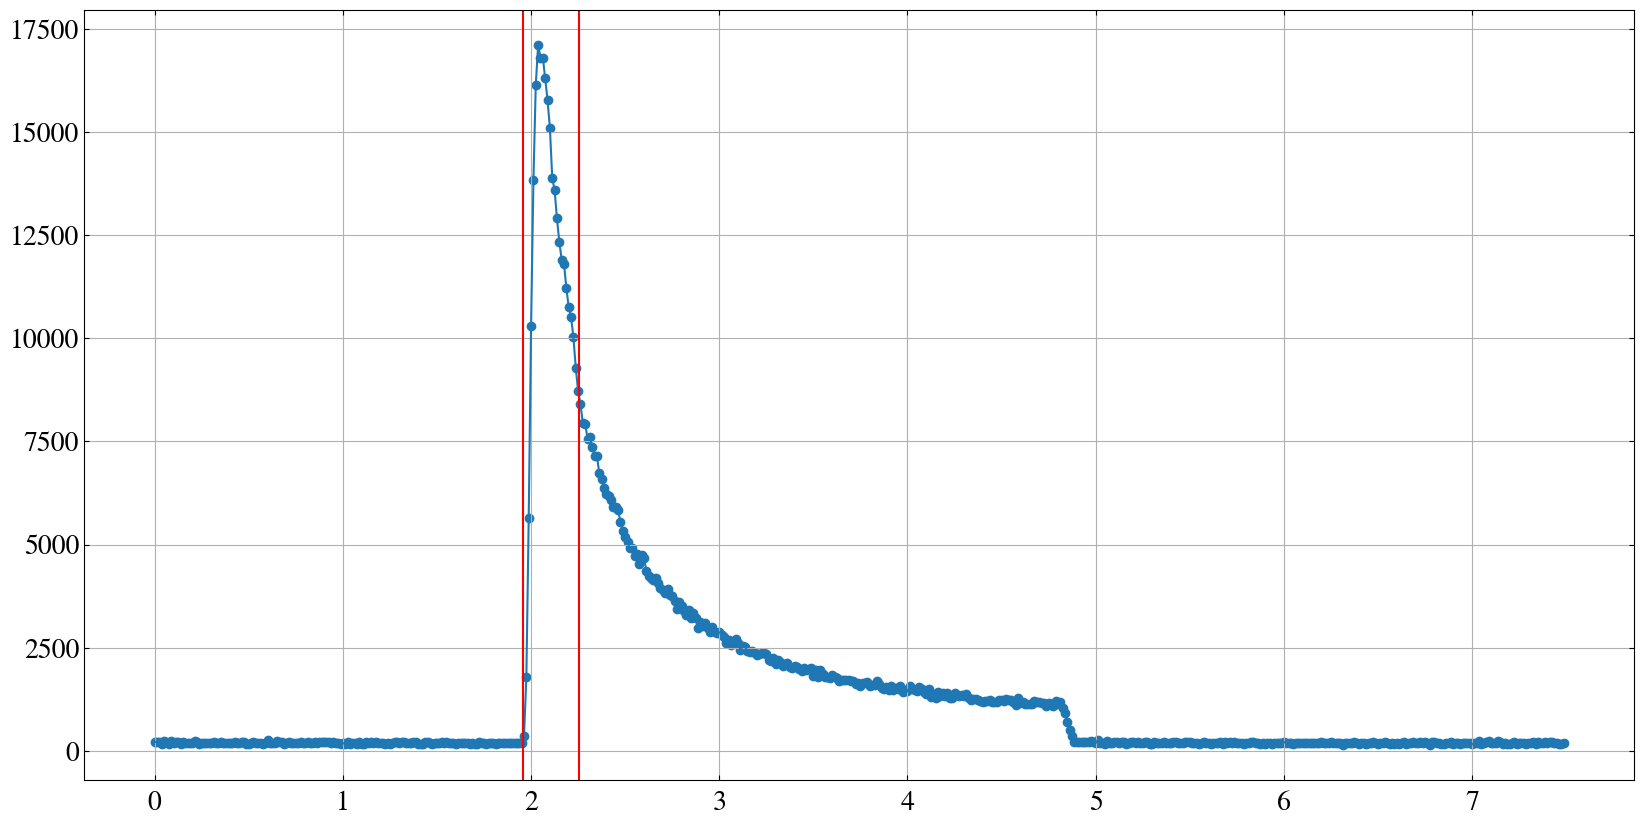

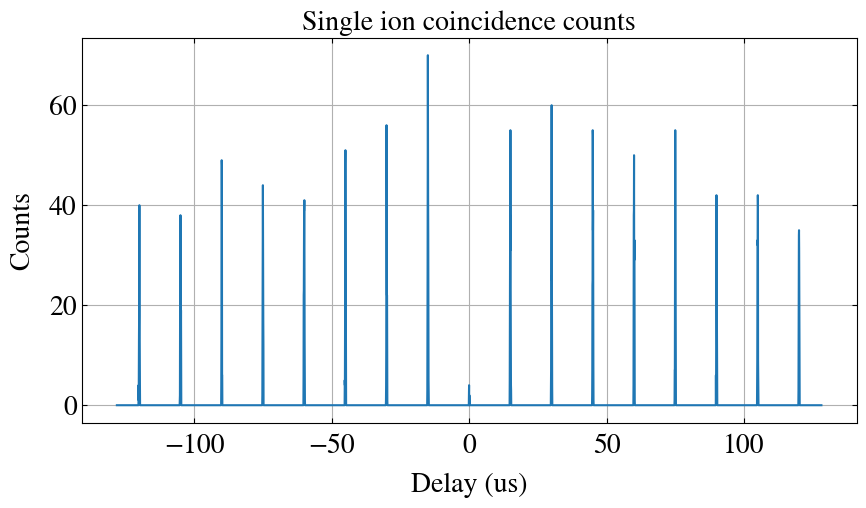

In [2]:
import os
from matplotlib import pyplot as plt
from datetime import datetime
import TimeTagger
import matplotlib
import asyncio
import numpy as np
from ipywidgets import Button
import plotly.graph_objs as go
import pprint

matplotlib.rcParams.update(
        {"font.family": "STIXGeneral",
         "xtick.labelsize": 20,
         "xtick.direction": "in",
         "xtick.major.pad": 8,
         "xtick.top": True,
         "ytick.labelsize": 20,
         "ytick.direction": "in",
         "ytick.right": True,
         "axes.labelsize": 20,
         "axes.labelpad": 10,
         "axes.grid": True
    }
)

# Useful function for printing what is stored in the folder and display the files that are just created
def print_folder_content(folder):
    """Print filename and size of the files in the folder."""
    print("Filename            |       Size")
    print("--------------------+-----------")
    filenames = os.listdir(folder)
    for filename in [filenames[-1]] + filenames[:-1]:
        print("{:<20}|{:>8.1f} kB".format(filename, os.path.getsize(folder + os.sep + filename)/1024))

# Getting the current date and time
now = datetime.now()
# Extracting the date, hour, and minute
current_date = now.date()
current_hour = now.hour
current_minute = now.minute
# Converting to a char string
formatted_string = f"Date {current_date}, Time {current_hour}-{current_minute}"

# filename=save_directory + "/filewriter" + formatted_string
# filename="D:/Data Storage/Multiplexing/g2_data" + "/filewriterDate 2024-01-04, Time 12-25.1"

all_raw_data = ["filewriterDate 2024-01-05, Time 13-40_single_ion.1",
                "filewriterDate 2024-01-05, Time 14-1_single_ion.1",
                "filewriterDate 2024-01-05, Time 18-31_9_ions.1.ttbin",
                "filewriterDate 2024-01-05, Time 18-31_9_ions.2.ttbin",
                "filewriterDate 2024-01-05, Time 18-31_9_ions.3.ttbin",
                "filewriterDate 2024-01-06, Time 11-23_9_ions.1.ttbin",
                "filewriterDate 2024-01-06, Time 11-23_9_ions.2.ttbin",
                "filewriterDate 2024-01-05, Time 18-31_9_ions.1.ttbin",
                "filewriterDate 2024-01-05, Time 18-31_9_ions.2.ttbin",
                "filewriterDate 2024-01-05, Time 18-31_9_ions.3.ttbin",
                "filewriterDate 2024-01-06, Time 16-18_9_ions.1.ttbin",
                "filewriterDate 2024-01-06, Time 16-18_9_ions.2.ttbin",
                "filewriterDate 2024-01-06, Time 16-18_9_ions.3.ttbin",
                "filewriterDate 2024-01-06, Time 16-18_9_ions.4.ttbin",
                "filewriterDate 2024-01-06, Time 16-18_9_ions.5.ttbin",
                "filewriterDate 2024-01-09, Time 18-59_9_ions.1.ttbin",
                "filewriterDate 2024-01-09, Time 18-59_9_ions.2.ttbin",
                "filewriterDate 2024-01-09, Time 18-59_9_ions.3.ttbin",
                "filewriterDate 2024-01-09, Time 18-59_9_ions.4.ttbin",
                "filewriterDate 2024-01-09, Time 18-59_9_ions.5.ttbin"]

all_raw_data = ["filewriterDate 2024-01-05, Time 13-40_single_ion.1",
                "filewriterDate 2024-01-05, Time 14-1_single_ion.1",
                "filewriterDate 2024-01-05, Time 18-31_9_ions.1.ttbin",
                "filewriterDate 2024-01-05, Time 18-31_9_ions.2.ttbin",
                "filewriterDate 2024-01-05, Time 18-31_9_ions.3.ttbin",
                "filewriterDate 2024-01-06, Time 11-23_9_ions.1.ttbin",
                "filewriterDate 2024-01-06, Time 11-23_9_ions.2.ttbin",
                "filewriterDate 2024-01-05, Time 18-31_9_ions.1.ttbin",
                "filewriterDate 2024-01-05, Time 18-31_9_ions.2.ttbin",
                "filewriterDate 2024-01-05, Time 18-31_9_ions.3.ttbin",
                "filewriterDate 2024-01-06, Time 16-18_9_ions.1.ttbin",
                "filewriterDate 2024-01-06, Time 16-18_9_ions.2.ttbin",
                "filewriterDate 2024-01-06, Time 16-18_9_ions.3.ttbin",
                "filewriterDate 2024-01-06, Time 16-18_9_ions.4.ttbin",
                "filewriterDate 2024-01-06, Time 16-18_9_ions.5.ttbin",
                "filewriterDate 2024-01-09, Time 18-59_9_ions.1.ttbin",
                "filewriterDate 2024-01-09, Time 18-59_9_ions.2.ttbin",
                "filewriterDate 2024-01-09, Time 18-59_9_ions.3.ttbin",
                "filewriterDate 2024-01-09, Time 18-59_9_ions.4.ttbin",
                "filewriterDate 2024-01-09, Time 18-59_9_ions.5.ttbin"]

raw_data = ["filewriterDate 2024-01-05, Time 13-40_single_ion.1",
            "filewriterDate 2024-01-05, Time 14-1_single_ion.1",
            "filewriterDate 2024-01-05, Time 18-31_9_ions.1.ttbin",
            "filewriterDate 2024-01-05, Time 18-31_9_ions.2.ttbin",
            "filewriterDate 2024-01-05, Time 18-31_9_ions.3.ttbin",
            "filewriterDate 2024-01-06, Time 11-23_9_ions.1.ttbin",
            "filewriterDate 2024-01-06, Time 11-23_9_ions.2.ttbin",
            "filewriterDate 2024-01-05, Time 18-31_9_ions.1.ttbin",
            "filewriterDate 2024-01-05, Time 18-31_9_ions.2.ttbin",
            "filewriterDate 2024-01-05, Time 18-31_9_ions.3.ttbin",
            "filewriterDate 2024-01-06, Time 16-18_9_ions.1.ttbin",
            "filewriterDate 2024-01-06, Time 16-18_9_ions.2.ttbin",
            "filewriterDate 2024-01-06, Time 16-18_9_ions.3.ttbin",
            "filewriterDate 2024-01-06, Time 16-18_9_ions.4.ttbin",
            "filewriterDate 2024-01-06, Time 16-18_9_ions.5.ttbin",
            "filewriterDate 2024-01-09, Time 18-59_9_ions.1.ttbin",
            "filewriterDate 2024-01-09, Time 18-59_9_ions.2.ttbin",
            "filewriterDate 2024-01-09, Time 18-59_9_ions.3.ttbin",
            "filewriterDate 2024-01-09, Time 18-59_9_ions.4.ttbin",
            "filewriterDate 2024-01-09, Time 18-59_9_ions.5.ttbin"]

# all_raw_data = ["filewriterDate 2024-01-05, Time 13-40_single_ion.1"]

# raw_data = ["/filewriterDate 2024-01-04, Time 21-0.1"]

# Number of bins and binwidth for correlation measurement
number = int(5700 * (0.9))
binwidth_corr = 50 * 1e3

# Number of bins and binwidth for histogram measurement
number_bins = 600
binwidth_hist = 125 * 1e3 / 10

time_filtering = (0.3) * 1e6
Start_time = 1.955
End_time = Start_time + time_filtering/1e6

# The Virtual Time Tagger is initialized similar to the physical one
tagger = TimeTagger.createTimeTaggerVirtual()
fig = plt.figure()

final_result = np.zeros(number)
final_hist = np.zeros(number_bins)

# number = 3000
# final_result = np.zeros(number)
# The loop allows us to repeat the replay several times
for data in all_raw_data:
    # print("\nInput data for the data replay")

    trigger_channel = 2
    PMT_channel1 = 1
    PMT_channel2 = 3
    binwidth = binwidth_corr  # Adjust binwidth as needed
    n_bins = number   # Adjust number of bins as needed
    # DELAY = 2000 * 1e3 # The gate time is 1us

    open_gate = TimeTagger.DelayedChannel(tagger=tagger, input_channel=trigger_channel, delay=Start_time * 1e6)
    open_gate_channel = open_gate.getChannel()
    close_gate = TimeTagger.DelayedChannel(tagger=tagger, input_channel=open_gate_channel, delay=time_filtering)
    close_gate_channel = close_gate.getChannel()

    gated_PMT_channel1 = TimeTagger.GatedChannel(tagger=tagger, input_channel=PMT_channel1, gate_start_channel=open_gate_channel, gate_stop_channel=close_gate_channel)
    gated_PMT_channel2 = TimeTagger.GatedChannel(tagger=tagger, input_channel=PMT_channel2, gate_start_channel=open_gate_channel, gate_stop_channel=close_gate_channel)

    # Start the correlation measurement
    # We can pass virtual_tagger to the "tagger" argument of any measurement class constructor
    corr = TimeTagger.Correlation(tagger=tagger, channel_1=gated_PMT_channel1.getChannel(), channel_2=gated_PMT_channel2.getChannel(), binwidth=binwidth_corr, n_bins=n_bins)
    # measurement_time = int(0.001 * 3600 * 1e12)  # Adjust measurement time as needed

    hist = TimeTagger.Histogram(tagger=tagger, click_channel=PMT_channel1, start_channel = trigger_channel, binwidth = binwidth_hist, n_bins = number_bins)

    # In general, the data are replayed at the same speed as they have been acquired.
    # You can modify the speed by a factor or replay them as fast es possible by speed < 0
    tagger.setReplaySpeed(speed=-1)

    # Start the replay
    filename = "D:/Data Storage/Multiplexing/g2_data/" + data
    tagger.replay(file=filename)

    # To check if the replay is finished, use the waitForCompletion method. If you want to do
    # something during the measurement (such as watching the accumulation), use a while loop and
    # timeout=0. If you just want to wait for completion, you can skip the loop and use
    # timeout=-1 instead.
    while not tagger.waitForCompletion(timeout=-1):
        fig.clear()
        plt.plot(corr.getIndex(), corr.getData())
        plt.xlabel("Time difference [ps]")
        plt.ylabel("Counts")
        plt.pause(.1)

    # Get the correlation data
    hist_data = hist.getData()
    hist_index = hist.getIndex() / 1e6
    final_hist += hist_data
    # np.save('hist_meas_'+formatted_string+'.npy', hist_index, hist_data)

    # Get the correlation data
    g2_data = corr.getData()
    index = corr.getIndex() / 1e6

    # Converting to a char string
    formatted_string = f"Date {current_date}, Time {current_hour}-{current_minute}"
    print(formatted_string)

    final_result += g2_data
    # np.save('corr_meas_'+formatted_string+'.npy', index, g2_data)

    # # Plot the g(2) function
    # plt.plot(index, g2_data)
    # plt.title("9 ions coincidence counts", fontdict={'size':20})
    # plt.xlabel("Delay (us)")
    # plt.ylabel("Counts")
    # plt.show()

    # Getting the current date and time
    now = datetime.now()

    # Extracting the date, hour, and minute
    current_date = now.date()
    current_hour = now.hour
    current_minute = now.minute

    # np.save('corr.getData_'+formatted_string+'.npy', corr.getData())
    # np.save('corr.getIndex_'+formatted_string+'.npy', corr.getIndex())

# Free the TimeTagger
TimeTagger.freeTimeTagger(tagger)

plt.figure(figsize = (20, 10))
plt.rc('font',family='STIXGeneral')
plt.scatter(hist_index, final_hist, c='C0')
plt.plot(hist_index, final_hist, c='C0')

plt.axvline(Start_time, color='r')
print("Start time =", Start_time, "us")
plt.axvline(End_time, color='r')
print("End time =", End_time, "us")

# Plot the g(2) function
plt.figure(figsize = (10, 5))
plt.plot(index, final_result)
plt.title("Single ion coincidence counts", fontdict={'size':20})
plt.xlabel("Delay (us)")
plt.ylabel("Counts")
plt.show()

np.save("final_result_static_single_ion.npy", final_result)

Total counts between Start_time and End_time: 809421.0
Estimated background counts: 46765.95
Real counts: 762655.05
cps: 70.61620833333333
Start time = 1.955 us
End time = 2.255 us
Start time = 1.955 us
End time = 2.255 us


2.8874999999999997

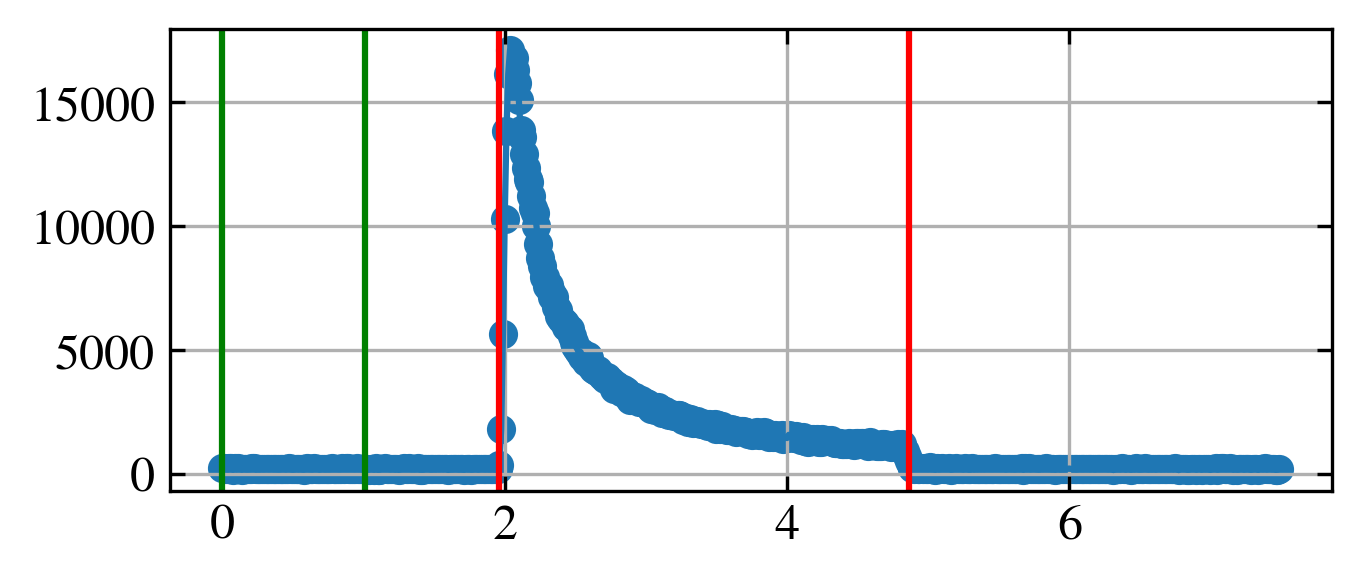

In [13]:
import numpy as np

# Assuming hist_index, final_hist, Start_time, and End_time are defined

# Convert hist_index to a numpy array for efficient indexing
hist_index_array = np.array(hist_index)
final_hist_array = np.array(final_hist)

# 1. Determine the Indices for Start_time and End_time
start_idx = np.searchsorted(hist_index_array, Start_time, side='left')
end_idx = np.searchsorted(hist_index_array, End_time + 2.6, side='right')

# 2. Sum Counts between Start_time and End_time
total_counts = np.sum(final_hist_array[start_idx:end_idx])

# 3. Calculate Background Counts
# Find the indices for the range 0 to 1
bg_start_idx = np.searchsorted(hist_index_array, 0, side='left')
bg_end_idx = np.searchsorted(hist_index_array, 1, side='right')

# Calculate the background counts in this initial range
bg_counts_initial = np.sum(final_hist_array[bg_start_idx:bg_end_idx])

# Estimate the background counts for the range between Start_time and End_time
# Assuming the background is uniform across the histogram
bg_rate_per_unit_time = bg_counts_initial / (hist_index_array[bg_end_idx-1] - hist_index_array[bg_start_idx])
time_duration = hist_index_array[end_idx-1] - hist_index_array[start_idx]
estimated_bg_counts = bg_rate_per_unit_time * time_duration

print("Total counts between Start_time and End_time:", total_counts)
print("Estimated background counts:", estimated_bg_counts)
print("Real counts:", total_counts-estimated_bg_counts)
print("cps:", (total_counts-estimated_bg_counts)*2 / (6 * 60 * 60))

plt.figure(figsize = (5, 2))
plt.rc('font',family='STIXGeneral')
plt.scatter(hist_index, final_hist, c='C0')
plt.plot(hist_index, final_hist, c='C0')

plt.axvline(hist_index_array[start_idx], color='r')
print("Start time =", Start_time, "us")
plt.axvline(hist_index_array[end_idx], color='r')
print("End time =", End_time, "us")

plt.axvline(hist_index_array[bg_start_idx], color='green')
print("Start time =", Start_time, "us")
plt.axvline(hist_index_array[bg_end_idx], color='green')
print("End time =", End_time, "us")

time_duration

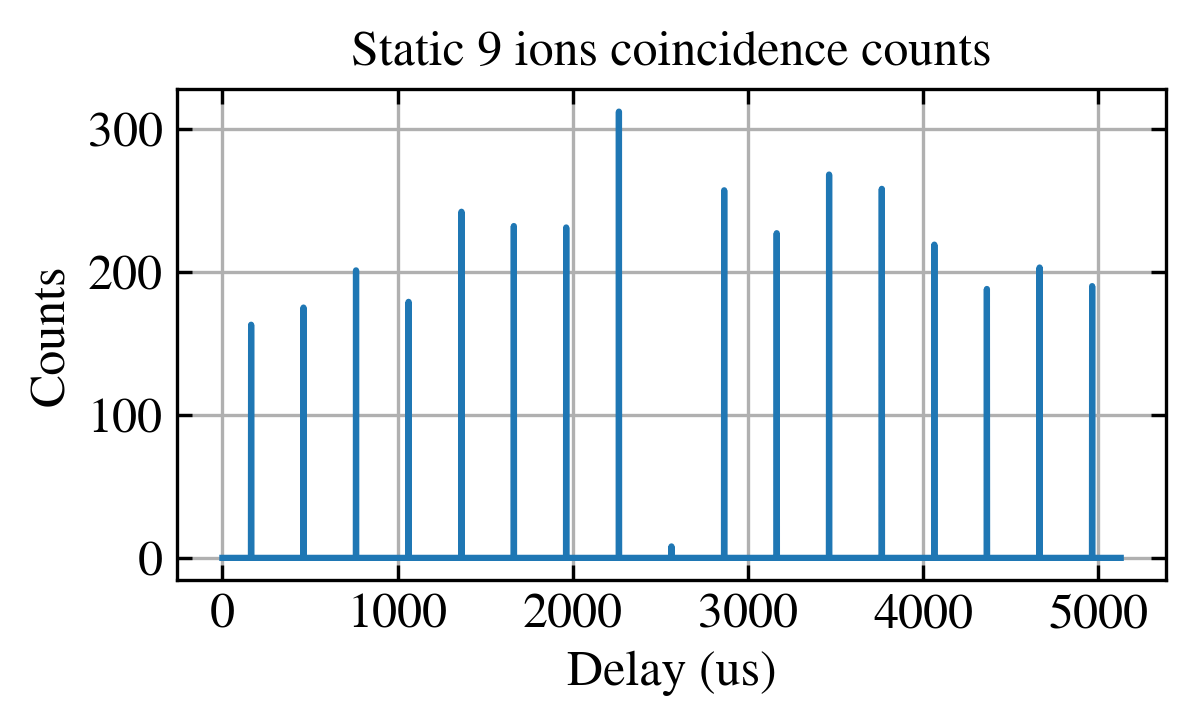

[163.0, 175.0, 201.0, 179.0, 242.0, 232.0, 231.0, 312.0, 8.0, 257.0, 227.0, 268.0, 258.0, 219.0, 188.0, 203.0, 190.0]
[164, 463, 763, 1063, 1365, 1664, 1963, 2264, 2564, 2865, 3165, 3464, 3765, 4065, 4365, 4666, 4966]
17
17


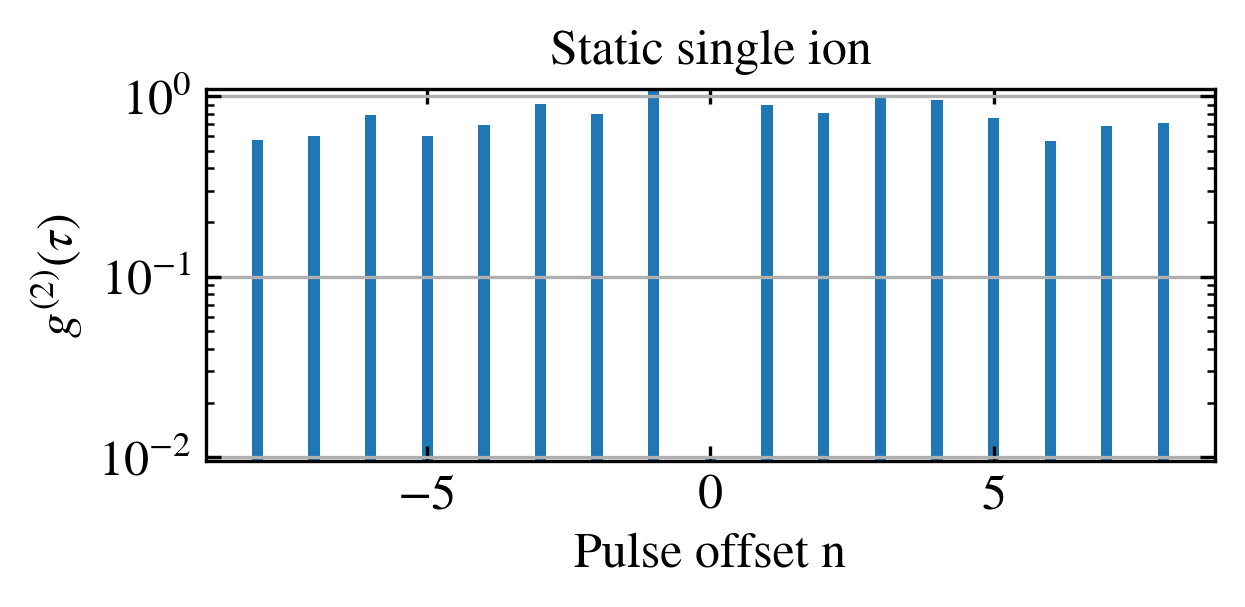

[0.5736040609137056, 0.6040609137055838, 0.7868020304568528, 0.6040609137055838, 0.6903553299492385, 0.9086294416243654, 0.8020304568527918, 1.1065989847715736, 0.01015228426395939, 0.8934010152284264, 0.8071065989847716, 0.9898477157360406, 0.9593908629441624, 0.7614213197969543, 0.5634517766497462, 0.6852791878172588, 0.7157360406091371]


In [17]:
import os
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib
import asyncio
import numpy as np
from ipywidgets import Button
import plotly.graph_objs as go
import pprint
# from PIL import Image  # Corrected from 'from PIL import Pillow'

matplotlib.rcParams.update(
        {"font.family": "STIXGeneral",
         "xtick.labelsize": 12,
         "xtick.direction": "in",
         "xtick.major.pad": 3,
         "xtick.top": True,
         "ytick.labelsize": 12,
         "ytick.direction": "in",
         "ytick.right": True,
         "axes.labelsize": 12,
         "axes.labelpad": 3,
         "axes.grid": True
    }
)

final_result = np.load("final_result_static_single_ion.npy")
# Example numpy array with peaks
data_temp = final_result

# Function to sum the values of nearby bins (5 bins) and set other bins to zero
def rearrange_peaks(data):
    # Length of the data array
    n = len(data)

    # New array to store the rearranged data
    new_data = np.zeros(n)

    # Iterate through the array
    for i in range(n):
        # Check if the current bin is a peak (max in its 5-bin neighborhood)
        if i == 0 or i == n-1:
            # Edge cases where the neighborhood is not 5 bins
            continue
        else:
            start = max(i-20, 0)
            end = min(i+20, n)
            if data[i] == max(data[start:end]):
                # Sum the values of the 5-bin neighborhood
                new_data[i] = np.sum(data[start:end])

    return new_data

# Apply the function to the data
rearranged_data = rearrange_peaks(data_temp)
# rearranged_data = rearranged_data/np.max(rearranged_data)

# Plot the g(2) function
half_column_width_inches = 4.25
aspect_ratio = 2  # You can adjust this for your desired aspect ratio
plt.figure(figsize=(half_column_width_inches, half_column_width_inches / aspect_ratio))
plt.plot(index, rearranged_data)
plt.title("Static 9 ions coincidence counts", fontdict={'size':12})
plt.xlabel("Delay (us)", fontdict={'size':12})
plt.ylabel("Counts", fontdict={'size':12})
plt.show()
# Getting the current date and time
now = datetime.now()
# Extracting the date, hour, and minute
current_date = now.date()
current_hour = now.hour
current_minute = now.minute
# Converting to a char string
formatted_string = f"Date {current_date}, Time {current_hour}-{current_minute}"
non_zero_numbers = [float(num) for num in rearranged_data if float(num) != 0]

non_zero_numbers = []
non_zero_x_labels = []

for num, x_label in zip(rearranged_data, index):
    if float(num) != 0:
        non_zero_numbers.append(float(num))
        non_zero_x_labels.append(x_label)

print(non_zero_numbers)
print(non_zero_x_labels)

# Re-plotting the binned data with the corrected windows
half_column_width_inches = 4.25
aspect_ratio = 2  # You can adjust this for your desired aspect ratio
plt.figure(figsize=(half_column_width_inches, half_column_width_inches / aspect_ratio))
# x_labels = [f"{start}-{end}" for (start, end) in bin_windows]
# window_num = np.array(range(19)) - 9
# x_labels = [f"window {i}" for i in window_num]
binned_counts = non_zero_numbers
# x_labels = non_zero_x_labels
x_labels = np.linspace(-8, 8, num=17)

print(len(x_labels))
print(len(binned_counts))

binned_counts = np.array([113.0, 119.0, 155.0, 119.0, 136.0, 179.0, 158.0, 218.0, 2.0, 176.0, 159.0, 195.0, 189.0, 150.0, 111.0, 135.0, 141.0])
binned_counts = [x/197 for x in binned_counts]
plt.bar(x_labels, binned_counts, color='C0', width=0.2)

# x_labels = np.linspace(non_zero_x_labels[0], non_zero_x_labels[-1], num=200)
plt.bar(x_labels, np.zeros(len(x_labels)), color='C0', width=0.1)
plt.ylim(0.0095, 1.1)
plt.yscale('log')  # Set log scale for Y-axis

# plt.plot(x_labels, binned_counts, color='C0')
# plt.xlabel(r'Delay time ($\mu$$s$)', fontdict={'family' : 'STIXGeneral', 'size':12})
plt.xlabel("Pulse offset n", fontdict={'family' : 'STIXGeneral', 'size':12})
plt.ylabel(r'$g^{(2)}(\tau)$', fontdict={'family' : 'STIXGeneral', 'size':12})
plt.title('Static single ion', fontdict={'family' : 'STIXGeneral', 'size':12})
# plt.xticks(x_labels[::3])   #,  rotation='vertical'
# plt.xticks(rotation=90)  # Rotate the labels to prevent overlap due to increased number of bins
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)
pdf_filename = 'Fig_3_c.pdf'  # Specify the path and filename you wish to use
plt.savefig(pdf_filename, format='pdf')
plt.show()
print(binned_counts)

In [ ]:
import os
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib
import asyncio
import numpy as np
from ipywidgets import Button
import plotly.graph_objs as go
import pprint
# from PIL import Image  # Corrected from 'from PIL import Pillow'

matplotlib.rcParams.update(
        {"font.family": "STIXGeneral",
         "xtick.labelsize": 12,
         "xtick.direction": "in",
         "xtick.major.pad": 3,
         "xtick.top": True,
         "ytick.labelsize": 12,
         "ytick.direction": "in",
         "ytick.right": True,
         "axes.labelsize": 12,
         "axes.labelpad": 3,
         "axes.grid": True
    }
)

final_result = np.load("final_result_static_single_ion.npy")
# Example numpy array with peaks
data_temp = final_result

# Function to sum the values of nearby bins (5 bins) and set other bins to zero
def rearrange_peaks(data):
    # Length of the data array
    n = len(data)

    # New array to store the rearranged data
    new_data = np.zeros(n)

    # Iterate through the array
    for i in range(n):
        # Check if the current bin is a peak (max in its 5-bin neighborhood)
        if i == 0 or i == n-1:
            # Edge cases where the neighborhood is not 5 bins
            continue
        else:
            start = max(i-20, 0)
            end = min(i+20, n)
            if data[i] == max(data[start:end]):
                # Sum the values of the 5-bin neighborhood
                new_data[i] = np.sum(data[start:end])

    return new_data

# Apply the function to the data
rearranged_data = rearrange_peaks(data_temp)
# rearranged_data = rearranged_data/np.max(rearranged_data)

# Plot the g(2) function
half_column_width_inches = 4.25
aspect_ratio = 2  # You can adjust this for your desired aspect ratio
plt.figure(figsize=(half_column_width_inches, half_column_width_inches / aspect_ratio))
plt.plot(index, rearranged_data)
plt.title("Static 9 ions coincidence counts", fontdict={'size':12})
plt.xlabel("Delay (us)", fontdict={'size':12})
plt.ylabel("Counts", fontdict={'size':12})
plt.show()
# Getting the current date and time
now = datetime.now()
# Extracting the date, hour, and minute
current_date = now.date()
current_hour = now.hour
current_minute = now.minute
# Converting to a char string
formatted_string = f"Date {current_date}, Time {current_hour}-{current_minute}"
non_zero_numbers = [float(num) for num in rearranged_data if float(num) != 0]

non_zero_numbers = []
non_zero_x_labels = []

for num, x_label in zip(rearranged_data, index):
    if float(num) != 0:
        non_zero_numbers.append(float(num))
        non_zero_x_labels.append(x_label)

print(non_zero_numbers)
print(non_zero_x_labels)

# Re-plotting the binned data with the corrected windows
half_column_width_inches = 4.25
aspect_ratio = 2  # You can adjust this for your desired aspect ratio
plt.figure(figsize=(half_column_width_inches, half_column_width_inches / aspect_ratio))
# x_labels = [f"{start}-{end}" for (start, end) in bin_windows]
# window_num = np.array(range(19)) - 9
# x_labels = [f"window {i}" for i in window_num]
binned_counts = non_zero_numbers
# x_labels = non_zero_x_labels
x_labels = np.linspace(-8, 8, num=17)

print(len(x_labels))
print(len(binned_counts))

binned_counts = np.array([113.0, 119.0, 155.0, 119.0, 136.0, 179.0, 158.0, 218.0, 2.0, 176.0, 159.0, 195.0, 189.0, 150.0, 111.0, 135.0, 141.0])
binned_counts = [x/197 for x in binned_counts]
plt.bar(x_labels, binned_counts, color='C0', width=0.2)

# x_labels = np.linspace(non_zero_x_labels[0], non_zero_x_labels[-1], num=200)
plt.bar(x_labels, np.zeros(len(x_labels)), color='C0', width=0.1)
plt.ylim(0.0095, 1.1)
plt.yscale('log')  # Set log scale for Y-axis

# plt.plot(x_labels, binned_counts, color='C0')
# plt.xlabel(r'Delay time ($\mu$$s$)', fontdict={'family' : 'STIXGeneral', 'size':12})
plt.xlabel("Pulse offset n", fontdict={'family' : 'STIXGeneral', 'size':12})
plt.ylabel(r'$g^{(2)}(\tau)$', fontdict={'family' : 'STIXGeneral', 'size':12})
plt.title('Static single ion', fontdict={'family' : 'STIXGeneral', 'size':12})
# plt.xticks(x_labels[::3])   #,  rotation='vertical'
# plt.xticks(rotation=90)  # Rotate the labels to prevent overlap due to increased number of bins
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)
pdf_filename = 'Fig_3_c.pdf'  # Specify the path and filename you wish to use
plt.savefig(pdf_filename, format='pdf')
plt.show()
print(binned_counts)

In [16]:
# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the data
ax.plot(x, y)

# Set the title and labels
ax.set_title("Sine Wave")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")

# Convert the figure to a NumPy array
fig.canvas.draw()
image_array = np.array(fig.canvas.renderer.buffer_rgba())

# Convert the NumPy array to a PIL Image
image = Image.fromarray(image_array)

# Save the PIL Image as a PNG image file and PDF file
image.save("output/sine_wave_pil.png")
image.save("output/sine_wave_pil.pdf")